<a href="https://colab.research.google.com/github/AndreaVega-dot/AndreaVega-dot/blob/main/OpenPay_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEST**

The following datasets contains data of some cars, their combustible consumption and a
classification based on that consumption. These are the features contained in the dataset:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete (1=american, 2=European, 3=asian)
9. car name: string (unique for each instance)
10. class_mpg: car class based on consumption (0-3)
11. is_able: binary classification based on consumption (0-1)

You have the following days to explore the attached dataset,
1.  **do a prediction over the
combustible consumption (mpg)**
2.  **do a classification training that predicts the car
class and if a car is able or not** . 

Feel free to use plots, feature engineering and
indicate possible future steps to make sure your knowledge is shown. Please attach
the script that you use to make all the conclusions, the necessary instructions to recreate
the solution and a PDF report with all the conclusions.

In [76]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
import plotly.express as px

#Prediction Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


#from sklearn.base import clone

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Classification Libraries
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

#Warning 
import warnings
warnings.filterwarnings('ignore')


In [38]:
#Read the data (imported to GITHUB)
url = "https://raw.githubusercontent.com/AndreaVega-dot/AndreaVega-dot/main/data.csv"
df= pd.read_csv(url)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,class_mpg,is_able
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,2,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,2,0


In [26]:
#Class distribution
df['class_mpg'].value_counts()

1    152
0    127
2    100
3     19
Name: class_mpg, dtype: int64

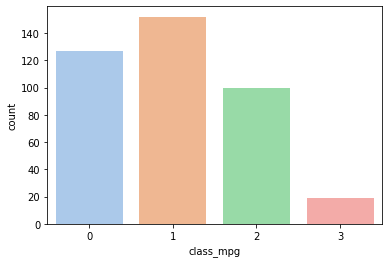

In [29]:
sns.countplot(x='class_mpg', data= df);

In [27]:
df['is_able'].value_counts()

0    345
1     53
Name: is_able, dtype: int64

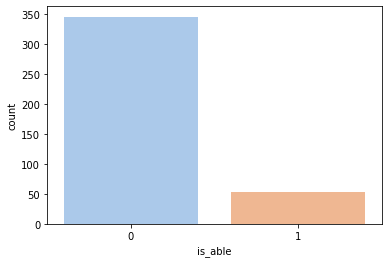

In [31]:
sns.countplot(x='is_able', data =df);

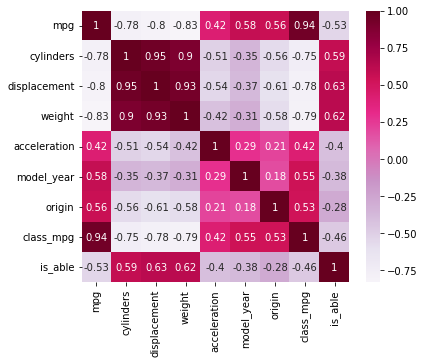

In [34]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(6, 5))
# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='PuRd');

# Preprocessing

In [4]:
#Dataframe for the prediction of mpg. Dropping the default columns
df_mpg= df.drop(columns=['class_mpg', 'is_able', 'car_name'])
df_mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


In [5]:
#Missing Value 

df_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [6]:
df_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
#Checking columns info and data types
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [8]:
#Transfor horsepower to float
#df_mpg.horsepower = df_mpg.horsepower.astype('float')

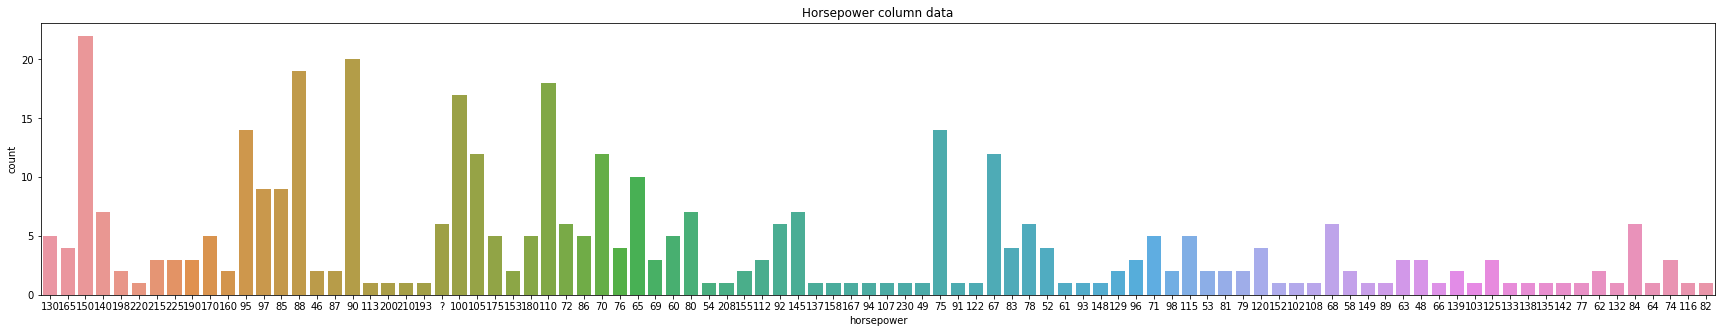

In [9]:
#Checking the problem with column horsepower. 
plt.figure(figsize=(30,5))
plt.title('Horsepower column data')
sns.countplot(data=df_mpg, x ='horsepower');

In [10]:
#below rows have the horse power values with ?. 
df_mpg[df_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [11]:
#Removing the rows with ? in horsepower
df_mpg = df_mpg[df_mpg['horsepower'] != '?']

#converting the data type of horsepower column
df_mpg.horsepower = df_mpg.horsepower.astype('float')

#Checking the datatype
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


# EDA

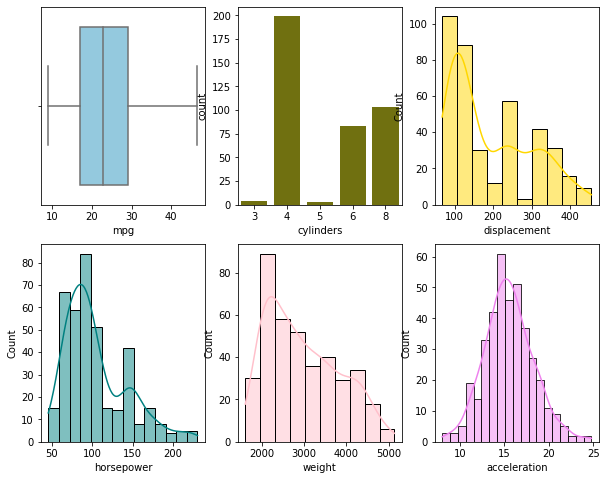

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.boxplot(data=df_mpg, x="mpg",  color="skyblue", ax=axs[0, 0])
sns.countplot(data=df_mpg, x="cylinders", color="olive", ax=axs[0, 1])
sns.histplot(data=df_mpg, x="displacement", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df_mpg, x="horsepower", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df_mpg, x="weight", kde=True, color="pink", ax=axs[1, 1])
sns.histplot(data=df_mpg, x="acceleration", kde=True, color="violet", ax=axs[1, 2])

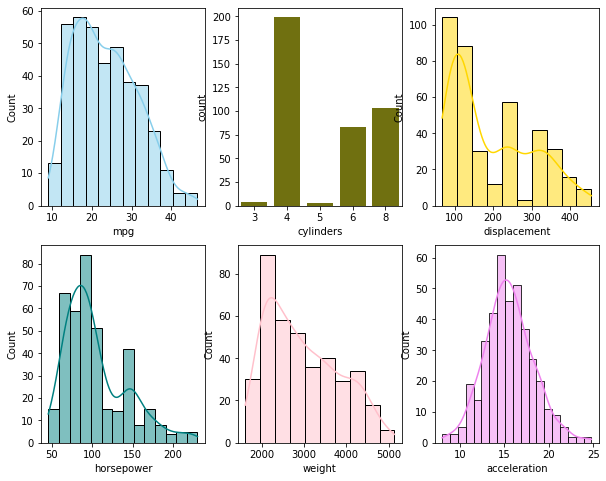

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.histplot(data=df_mpg, x="mpg", kde=True, color="skyblue", ax=axs[0, 0])
sns.countplot(data=df_mpg, x="cylinders", color="olive", ax=axs[0, 1])
sns.histplot(data=df_mpg, x="displacement", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df_mpg, x="horsepower", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df_mpg, x="weight", kde=True, color="pink", ax=axs[1, 1])
sns.histplot(data=df_mpg, x="acceleration", kde=True, color="violet", ax=axs[1, 2])



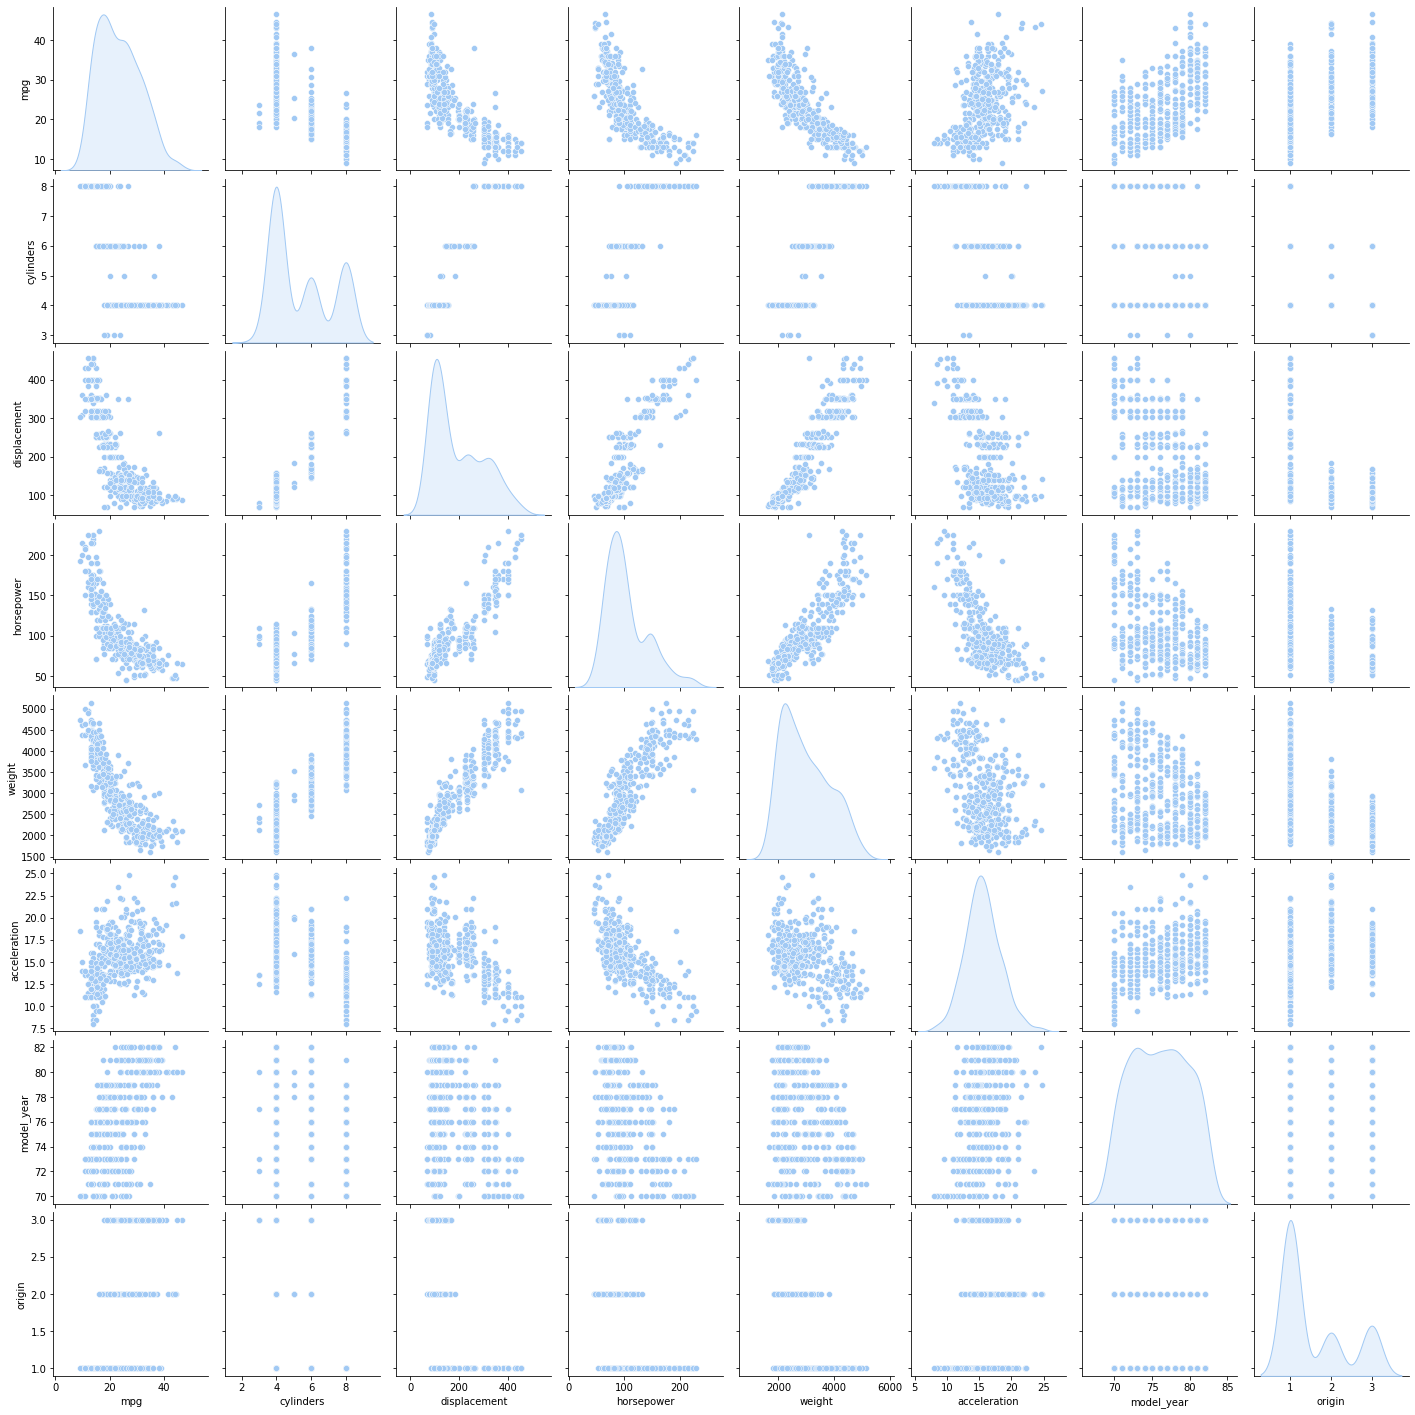

In [14]:
#checking the pair plot for numerical columns
sns.pairplot(df_mpg, diag_kind = "kde")
plt.show()

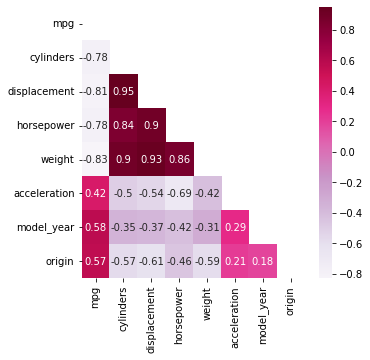

In [15]:
# Correlation between different variables
corr = df_mpg.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(5, 5))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask,  cmap='PuRd');

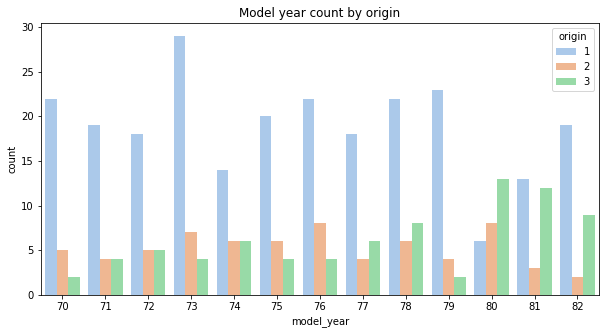

In [16]:
#Undertanding the country that producted more vehicles through 70-82
plt.figure(figsize=(10,5))
plt.title('Model year count by origin')
sns.countplot(data=df_mpg, x ='model_year', hue='origin');

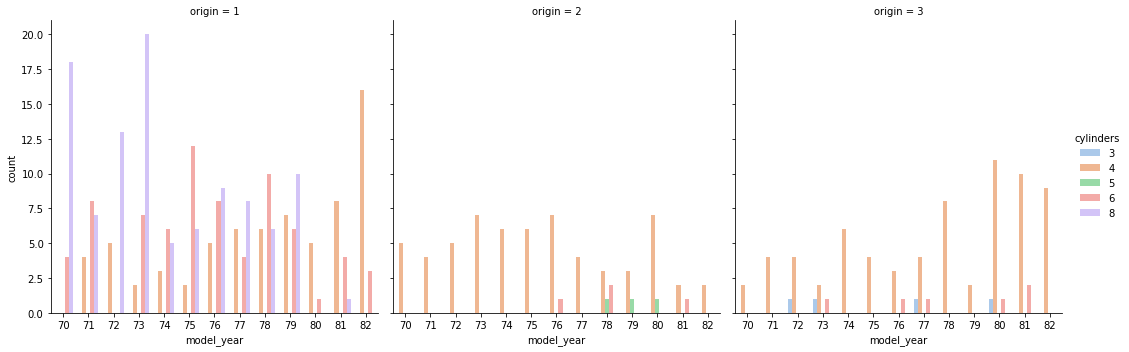

In [17]:
sns.catplot(x="model_year", hue="cylinders", col="origin",
                data=df_mpg, kind="count",
                height=5, aspect=1);

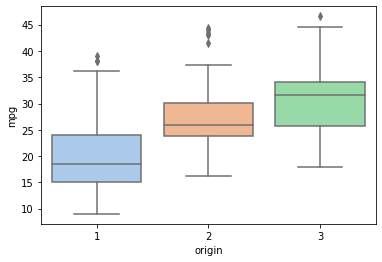

In [18]:
sns.boxplot(x = 'origin', y = 'mpg', data = df_mpg);

# Model

In [19]:
df_mpg = pd.get_dummies(df_mpg, columns=["cylinders","origin"])
df_mpg

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,82,0,1,0,0,0,1,0,0
394,44.0,97.0,52.0,2130,24.6,82,0,1,0,0,0,0,1,0
395,32.0,135.0,84.0,2295,11.6,82,0,1,0,0,0,1,0,0
396,28.0,120.0,79.0,2625,18.6,82,0,1,0,0,0,1,0,0


In [20]:
# Split data
x = df_mpg.drop(["mpg"], axis = 1)
y = df_mpg.mpg

test_size = 0.7
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size = test_size, random_state = 42)

# Standardization with minmax scaler                
scaler = MinMaxScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#Models
lr = LinearRegression()
svmr= svm.SVR(kernel='poly') #Kernel options: linear', 'poly', 'rbf', 'sigmoid'; Choosen best option POLY
xgb = XGBRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
knnr = KNeighborsRegressor()

# Train the models
lr.fit(X_train, Y_train)
svmr.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)
dtr.fit(X_train, Y_train)
rfr.fit(X_train, Y_train)
knnr.fit(X_train, Y_train)

#Test Prediction
lr_predict = lr.predict(X_test)
svmr_predict = svmr.predict(X_test)
xgb_predict = xgb.predict(X_test)
dtr_predict = dtr.predict(X_test)
rfr_predict = rfr.predict(X_test)
knnr_predict= knnr.predict(X_test)



[20:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
### QUITAR AL FINAL
results = pd.DataFrame(
{ 'Lineal Regression': lr_predict, 
 'SVMR': svmr_predict,
 'xgb': xgb_predict,
 'Decision Tree': dtr_predict,
 'Random Forest': rfr_predict})
results.head()

,Lineal Regression,SVMR,xgb,Decision Tree,Random Forest
0,26.663288,26.874125,28.966785,23.0,28.725
1,25.540392,28.861239,22.385141,24.0,23.662
2,35.362731,32.213252,35.799282,38.1,35.283
3,26.463289,24.606201,30.314409,30.0,29.880
4,29.131189,30.872845,26.645473,26.0,27.142


In [23]:
#Computing the RSME values for each model
accuracy = dict()
accuracy['LinealRegression'] = np.sqrt(mean_squared_error(Y_test, lr_predict)),
accuracy['SVMR'] = np.sqrt(mean_squared_error(Y_test, svmr_predict)),
accuracy['XGBoost'] = np.sqrt(mean_squared_error(Y_test, xgb_predict)),
accuracy['DecisionTree'] = np.sqrt(mean_squared_error(Y_test, dtr_predict)),
accuracy['RandomForest'] = np.sqrt(mean_squared_error(Y_test,rfr_predict)),
accuracy['knn Regression'] = np.sqrt(mean_squared_error(Y_test,knnr_predict)),
print("RMSE: ", accuracy)

RMSE:  {'LinealRegression': (3.52575719616188,), 'SVMR': (3.5248056144034634,), 'XGBoost': (3.3496410707521407,), 'DecisionTree': (3.5888970197237224,), 'RandomForest': (3.2710432581003324,), 'knn Regression': (3.7229472196097544,)}


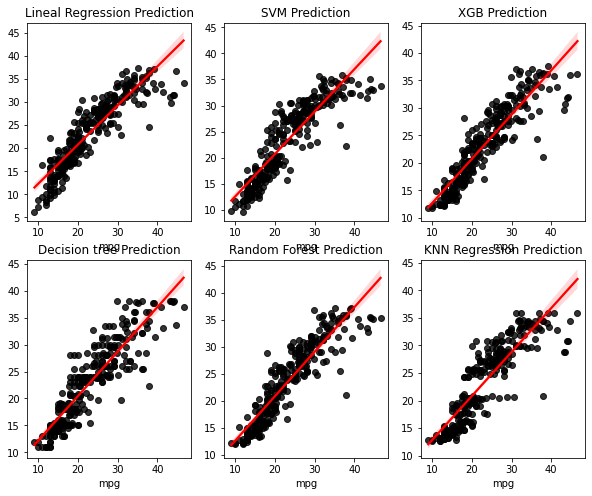

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8)) 
sns.regplot(Y_test,lr_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[0, 0]).set(title='Lineal Regression Prediction');
sns.regplot(Y_test,svmr_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[0, 1]).set(title='SVM Prediction');
sns.regplot(Y_test,xgb_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[0, 2]).set(title='XGB Prediction');
sns.regplot(Y_test,dtr_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[1, 0]).set(title='Decision tree Prediction');
sns.regplot(Y_test,rfr_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[1, 1]).set(title='Random Forest Prediction');
sns.regplot(Y_test,knnr_predict,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=axs[1, 2]).set(title='KNN Regression Prediction');

# Classificacion

In [61]:
# Features & Labels
Xfeatures = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']]
ylabels = df[['class_mpg','is_able']]

In [62]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.7,random_state=7)

In [63]:
clasmodel = MultiOutputClassifier(LogisticRegression())

In [64]:
clasmodel.fit(x_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [65]:
# Accuracy Score
clasmodel.score(x_test,y_test)

0.7885304659498208

In [66]:
# Sample Prediction
print(x_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

mpg               26.0
cylinders          4.0
displacement     116.0
weight          2246.0
acceleration      14.0
model_year        74.0
origin             2.0
Name: 148, dtype: float64
Actual Prediction: class_mpg    1
is_able      0
Name: 148, dtype: int64


# Sección nueva

In [77]:
#knn = KNeighborsClassifier(n_neighbors=3)
#classifier = MultiOutputClassifier(knn, n_jobs=-1)
rdm = RandomForestClassifier(max_depth=2, random_state=0)
classifier = MultiOutputClassifier(rdm)

In [78]:
classifier.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=2,
                                                       random_state=0))

In [79]:
# Accuracy Score
classifier.score(x_test,y_test)

0.8530465949820788

In [80]:
# Sample Prediction
print(x_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

mpg               26.0
cylinders          4.0
displacement     116.0
weight          2246.0
acceleration      14.0
model_year        74.0
origin             2.0
Name: 148, dtype: float64
Actual Prediction: class_mpg    1
is_able      0
Name: 148, dtype: int64
